In [38]:
import pandas as pd
import numpy as np
import time
import csv
import math
import os
import matplotlib as mpl
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.animation import writers

%matplotlib notebook

In [39]:
def normalize(x):
    max_val = np.max(np.abs(x))
    return x / max_val

In [40]:
def spectrum(Vib_Freq, observable, fwhm, num_points, spectro):
    max_freq = 0.49593677
    min_freq = 0
    delta = float((max_freq-min_freq)/num_points)
    Vib_Freq_axis = np.arange(min_freq, max_freq, delta)
    Vib_Freq_axis_cm1 = Vib_Freq_axis*8065.54429
    spec = np.zeros_like(Vib_Freq_axis)
    if spectro == 'ROA':
        peak_pos = peak_finder(observable, Vib_Freq)
        for j in range(len(peak_pos)):
            spec += observable[j]/(1+(2*(Vib_Freq_axis-peak_pos[j])/fwhm)**2)
    else:
        for j in range(len(Vib_Freq)):
            spec += (1/((2.296*10**(-39))*np.sqrt(np.pi)*fwhm))*Vib_Freq[j]*observable[j]*np.exp(-((Vib_Freq_axis-Vib_Freq[j])/fwhm)**2)
    return normalize(spec), Vib_Freq_axis_cm1


In [41]:
def peak_finder(CID3, Vib_Freq):
    peak_pos = []
    peaks, _ = find_peaks(CID3)
    for i in range(len(peaks)):
        temp = peaks[i]
        peak_pos.append(Vib_Freq[temp])
    return np.array(peak_pos)

In [42]:
num_points = 2000
fwhm = 0.02

In [43]:

t1 = time.time()

df = pd.read_csv("C:/Users/Aparna K/Downloads/code/Conformer_Generators/3.5/6-31G/MD_100/Sorted.txt", header=None, delimiter='\t')
combined = df[[2,3]].to_numpy()
Vib_Freq = combined[:,0]
observable = combined[:,1]

ROA_2, Vib_Freq_axis_2 = spectrum(Vib_Freq, observable, fwhm, num_points, 'ROA')

t2 = time.time()
print(t2-t1)

0.14432358741760254


In [44]:

t1 = time.time()

df = pd.read_csv("C:/Users/Aparna K/Downloads/code/Conformer_Generators/3.5/6-311G/MD_100/Sorted.txt", header=None, delimiter='\t')
combined = df[[2,3]].to_numpy()
Vib_Freq = combined[:,0]
observable = combined[:,1]

ROA_3, Vib_Freq_axis_3 = spectrum(Vib_Freq, observable, fwhm, num_points, 'ROA')

t2 = time.time()
print(t2-t1)

0.14317560195922852


In [45]:

t1 = time.time()

df = pd.read_csv("C:/Users/Aparna K/Downloads/code/Conformer_Generators/3.5/cc-pVDZ/MD_100/Sorted.txt", header=None, delimiter='\t')
combined = df[[2,3]].to_numpy()
Vib_Freq = combined[:,0]
observable = combined[:,1]

ROA_ref, Vib_Freq_axis_ref = spectrum(Vib_Freq, observable, fwhm, num_points, 'ROA')

t2 = time.time()
print(t2-t1)

0.1457357406616211


In [46]:

t1 = time.time()

df = pd.read_csv("C:/Users/Aparna K/Downloads/code/Conformer_Generators/3.5/3-21G/MD_100/Sorted.txt", header=None, delimiter='\t')
combined = df[[2,3]].to_numpy()
Vib_Freq = combined[:,0]
observable = combined[:,1]

ROA_1, Vib_Freq_axis_1 = spectrum(Vib_Freq, observable, fwhm, num_points, 'ROA')

t2 = time.time()
print(t2-t1)

0.13257837295532227


In [47]:
spec_theory = np.array((ROA_1, ROA_2, ROA_3))

In [48]:
num_wrong_sign = []
for i in range(len(spec_theory)):
    num_wrong_sign.append(np.sum(np.multiply(ROA_ref, spec_theory[i]) < 0))

In [49]:
num_wrong_sign

[1074, 1223, 966]

<IPython.core.display.Javascript object>


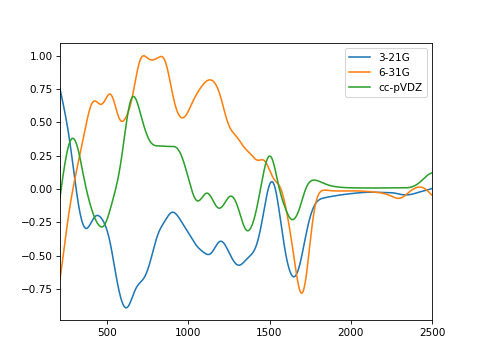

In [55]:
fig,ax = plt.subplots()
ax.plot(Vib_Freq_axis_1, ROA_1, label = '3-21G')
ax.plot(Vib_Freq_axis_2, ROA_2, label = '6-31G')
#ax.plot(Vib_Freq_axis_3, ROA_3, label = '6-311G')
ax.plot(Vib_Freq_axis_ref, ROA_ref, label = 'cc-pVDZ')

ax.set_xlim(210,2500)

ax.legend()

plt.show()

In [70]:
df = pd.read_csv("C:/Users/Aparna K/Downloads/code/Conformer_Generators/3.5/3-21G/MD_100/Combined_Free_Energy.txt", header=None, delimiter='\t')
combined = df[[0,1]].to_numpy()
GFE_1 = combined[:,1]
cmpd = combined[:,0]

df = pd.read_csv("C:/Users/Aparna K/Downloads/code/Conformer_Generators/3.5/6-31G/MD_100/Combined_Free_Energy.txt", header=None, delimiter='\t')
combined = df[[0,1]].to_numpy()
GFE_2 = combined[:,1]

df = pd.read_csv("C:/Users/Aparna K/Downloads/code/Conformer_Generators/3.5/6-311G/MD_100/Combined_Free_Energy.txt", header=None, delimiter='\t')
combined = df[[0,1]].to_numpy()
GFE_3 = combined[:,1]

df = pd.read_csv("C:/Users/Aparna K/Downloads/code/Conformer_Generators/3.5/cc-pVDZ/MD_100/Combined_Free_Energy.txt", header=None, delimiter='\t')
combined = df[[0,1]].to_numpy()
GFE_ref = combined[:,1]

In [71]:
GFE = np.array((GFE_1, GFE_2, GFE_3))

<IPython.core.display.Javascript object>


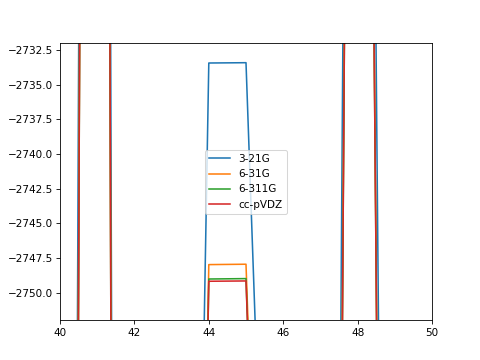

In [72]:
fig, ax = plt.subplots()

ax.plot(cmpd, GFE_1, label = '3-21G')
ax.plot(cmpd, GFE_2, label = '6-31G')
ax.plot(cmpd, GFE_3, label = '6-311G')
ax.plot(cmpd, GFE_ref, label = 'cc-pVDZ')
ax.set_xlim(40,50)
ax.set_ylim(-2752,-2732)
ax.legend()
plt.show()